In [1]:
# Following code is copied from the documentation for the dataset being used
# Dataset and documentation: https://dev.socrata.com/foundry/data.lacity.org/9yda-i4ya
# Import required libraries
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)

# All results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("9yda-i4ya", limit = 60000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

# Preview of the data
results_df.head()

,building_address,building_id,compliance,postal_code,program_year,apn,building_programclass,total_ghg_emissions,percent_difference_2,percent_difference_1,...,number_of_buildings,occupancy,outdoor_water_use,primary_property_1,site_eui,source_eui,water_use,weather_normalized_3,weather_normalized_4,year_built
0,14558 KESWICK ST,425463899040,NOT COMPLIED,91405,2021,028,"20,000 to 49,999 sqft",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5500 S FIGUEROA ST,476102819647,NOT COMPLIED,90037,2020,054,"20,000 to 49,999 sqft",138.1,29.5,29.5,...,1,100,Not Available,Multifamily Housing,54.7,99.9,2859.8,55.3,100.5,2001
2,11340 W OLYMPIC BLVD,427804836294,COMPLIED,90064,2020,017,"50,000 to 99,999 sqft",170.6,-47.8,-47.8,...,1,75,Not Available,Office,30.3,84.9,1052.3,Not Available,Not Available,1975
3,5650 FAIR AVE,448460885789,COMPLIED,91601,2021,011,"20,000 to 49,999 sqft",65.9,-27,-27,...,1,100,Not Available,Multifamily Housing,38.4,59.8,1.6,39.1,60.6,2010
4,4715 S ALAMEDA ST,488532822539,COMPLIED,90058,2021,011,"50,000 to 99,999 sqft",64.1,Not Available,Not Available,...,1,100,Not Available,Manufacturing/Industrial Plant,16.3,45.6,244.3,16.3,45.6,2007


In [2]:
results_clean_df = results_df.loc[:,['building_id', 'total_ghg_emissions', 'occupancy', 'primary_property_1', 'property_gfa_1', \
'water_use', 'weather_normalized_3', 'weather_normalized_4', 'year_built']]
results = results_clean_df.replace("Not Available", np.nan)
results = results.dropna()


In [3]:
results_init= results.astype({'total_ghg_emissions': 'float',
                     'occupancy': 'float',
                     'property_gfa_1': 'float', 
                      'water_use': 'float',
                      'weather_normalized_3': 'float',
                      'weather_normalized_4': 'float',
                      'year_built': 'float'
                     })

results_final = results_init.loc[results_init["occupancy"] != 0]
results_final

,building_id,total_ghg_emissions,occupancy,primary_property_1,property_gfa_1,water_use,weather_normalized_3,weather_normalized_4,year_built
1,476102819647,138.1,100.0,Multifamily Housing,44769.0,2859.8,55.3,100.5,2001.0
3,448460885789,65.9,100.0,Multifamily Housing,31030.0,1.6,39.1,60.6,2010.0
4,488532822539,64.1,100.0,Manufacturing/Industrial Plant,65000.0,244.3,16.3,45.6,2007.0
5,455587859077,33.5,100.0,Multifamily Housing,27777.0,837.1,20.0,40.3,1961.0
7,423570837725,24.2,100.0,Multifamily Housing,30095.0,1303.9,13.9,24.2,1960.0
...,...,...,...,...,...,...,...,...,...
52578,487878840146,230.3,100.0,Multifamily Housing,105715.0,12530.6,37.8,75.1,1996.0
52579,481125799862,118.0,100.0,Multifamily Housing,69943.0,2476.1,29.1,55.7,2003.0
52580,379589902773,59.7,100.0,Multifamily Housing,28821.0,2283.1,36.6,68.3,1962.0
52581,410020916912,68.2,100.0,Multifamily Housing,21506.0,1468.4,57.4,105.0,1962.0


In [4]:
property_types_counts = results_final.groupby(['primary_property_1'])['building_id'].count().sort_values(ascending = False)
property_types_counts

primary_property_1
Multifamily Housing                    12573
Office                                  3316
Manufacturing/Industrial Plant          1311
Non-Refrigerated Warehouse              1165
Self-Storage Facility                    659
                                       ...  
Urgent Care/Clinic/Other Outpatient        2
Convenience Store with Gas Station         2
Roller Rink                                1
Courthouse                                 1
Bureau                                     1
Name: building_id, Length: 76, dtype: int64

In [5]:
keep_property_types = property_types_counts.loc[property_types_counts > 300]
keep_property_types = keep_property_types.drop(labels=['Other'])
keep_property_types = list(keep_property_types.index)
keep_property_types

['Multifamily Housing',
 'Office',
 'Manufacturing/Industrial Plant',
 'Non-Refrigerated Warehouse',
 'Self-Storage Facility',
 'Distribution Center',
 'Retail Store',
 'Fire Station',
 'Mixed Use Property',
 'Hotel',
 'Medical Office',
 'Parking']

In [6]:
buildings_initial = results_final.loc[results_clean_df['primary_property_1'].isin(keep_property_types)]
buildings_df = buildings_initial.rename(columns = {"weather_normalized_3":"WN_site_eui",
                                                   "weather_normalized_4":"WN_source_eui"
                                                  }
                                       )
buildings_df

,building_id,total_ghg_emissions,occupancy,primary_property_1,property_gfa_1,water_use,WN_site_eui,WN_source_eui,year_built
1,476102819647,138.1,100.0,Multifamily Housing,44769.0,2859.8,55.3,100.5,2001.0
3,448460885789,65.9,100.0,Multifamily Housing,31030.0,1.6,39.1,60.6,2010.0
4,488532822539,64.1,100.0,Manufacturing/Industrial Plant,65000.0,244.3,16.3,45.6,2007.0
5,455587859077,33.5,100.0,Multifamily Housing,27777.0,837.1,20.0,40.3,1961.0
7,423570837725,24.2,100.0,Multifamily Housing,30095.0,1303.9,13.9,24.2,1960.0
...,...,...,...,...,...,...,...,...,...
52578,487878840146,230.3,100.0,Multifamily Housing,105715.0,12530.6,37.8,75.1,1996.0
52579,481125799862,118.0,100.0,Multifamily Housing,69943.0,2476.1,29.1,55.7,2003.0
52580,379589902773,59.7,100.0,Multifamily Housing,28821.0,2283.1,36.6,68.3,1962.0
52581,410020916912,68.2,100.0,Multifamily Housing,21506.0,1468.4,57.4,105.0,1962.0


## Discover the property type which has the highest correlation between water use and Carbon Dioxide emissions, as well as the highest correlation between source EUI and Carbon Emissions. 

In [7]:
def linear_regress(x, y, xl, yl):
    r = st.pearsonr(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    print(f"The r-value is: {r[0]}, the linear equation the line of best fit is: {line_eq}")
#     plt.annotate(line_eq, text_coordinate, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{xl}")
    plt.ylabel(f"{yl}")

In [8]:
# Create a DataFrame which shows the correlation between Carbon Dioxide emissions and other varibales (water Consumption and source EUI). 
corr_df=buildings_df.groupby('primary_property_1')[['total_ghg_emissions', 'water_use', 'WN_source_eui']].corr()
corr_df=corr_df.reset_index()
corr_df.columns=['Property Type', 'x', 'Carbon Dioxide Emissions', 'Water Consumption', 'Source EUI']

corr_df

,Property Type,x,Carbon Dioxide Emissions,Water Consumption,Source EUI
0,Distribution Center,total_ghg_emissions,1.000000,0.039431,0.911813
1,Distribution Center,water_use,0.039431,1.000000,0.016375
2,Distribution Center,WN_source_eui,0.911813,0.016375,1.000000
3,Fire Station,total_ghg_emissions,1.000000,0.019279,0.837756
4,Fire Station,water_use,0.019279,1.000000,0.395135
5,Fire Station,WN_source_eui,0.837756,0.395135,1.000000
6,Hotel,total_ghg_emissions,1.000000,0.002078,0.291114
7,Hotel,water_use,0.002078,1.000000,-0.020709
8,Hotel,WN_source_eui,0.291114,-0.020709,1.000000
9,Manufacturing/Industrial Plant,total_ghg_emissions,1.000000,0.717306,0.511838


### Display Highly Correlated Property Types (Water Consumption vs. Carbon Dioxide Emissions, Source EUI vs. Carbon Dioxide Emissions

<AxesSubplot:xlabel='Property Type', ylabel='Correlation Between Water Consumption and Carbon Dioxide Emission'>

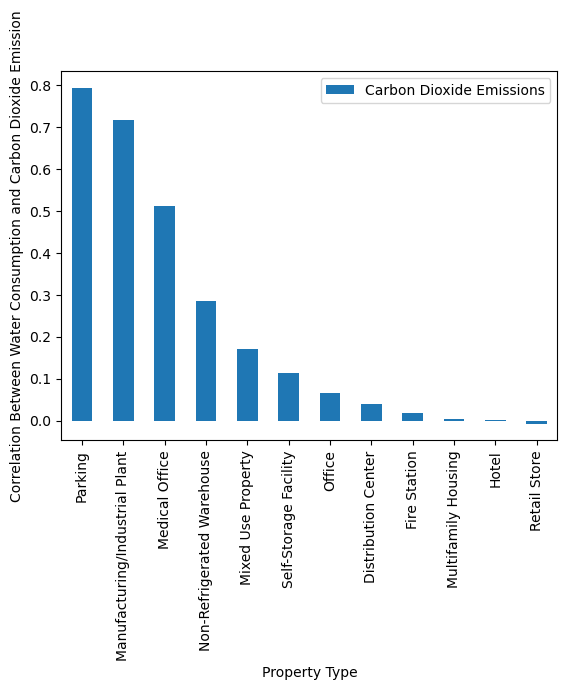

In [9]:
# Display the top highly correlated property types for water consumption vs. Carbon Dioxide Emissions
plot_df=corr_df[corr_df['x']=='water_use'][['Property Type', 'Carbon Dioxide Emissions']].sort_values(by=['Carbon Dioxide Emissions'], ascending = False)
plot_df.plot(kind='bar', x='Property Type', y='Carbon Dioxide Emissions', ylabel = 'Correlation Between Water Consumption and Carbon Dioxide Emission')

<AxesSubplot:xlabel='Property Type', ylabel='Correlation Between Source EUI and Carbon Dioxide Emission'>

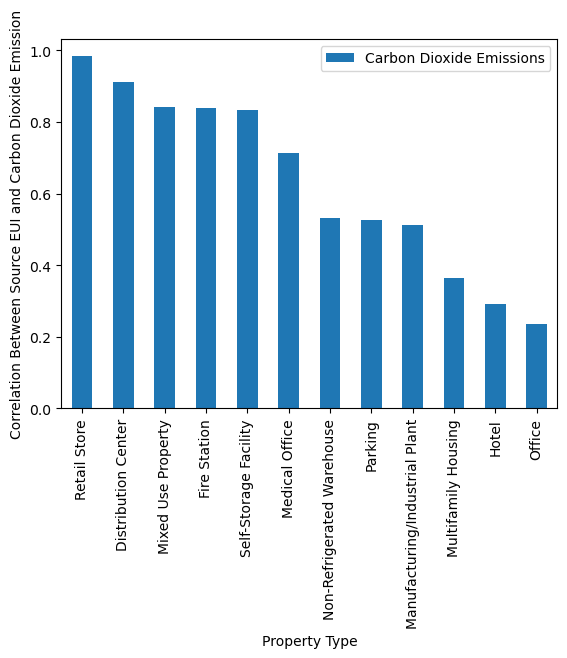

In [10]:
# Display the top highly correlated property types for source EUI vs. Carbon Dioxide Emissions
plot_df=corr_df[corr_df['x']=='WN_source_eui'][['Property Type', 'Carbon Dioxide Emissions']].sort_values(by=['Carbon Dioxide Emissions'], ascending = False)
plot_df.plot(kind='bar', x='Property Type', y='Carbon Dioxide Emissions', ylabel = 'Correlation Between Source EUI and Carbon Dioxide Emission')

### Relationship Between Water Use and Carbon Dioxide Emissions for buildings that are Manufacturing/Industrial Plants

In [11]:
# Create DataFrame for Plotting
water_plot_df = buildings_df.loc[buildings_df['primary_property_1']=='Manufacturing/Industrial Plant', ["water_use", "total_ghg_emissions"]]
water_plot_df.head()

,water_use,total_ghg_emissions
4,244.3,64.1
34,472.0,65.6
37,285.1,42.8
38,51.6,17.8
79,1274.7,203.3


The r-value is: 0.7173057056152874, the linear equation the line of best fit is: y = 0.09x + 274.63


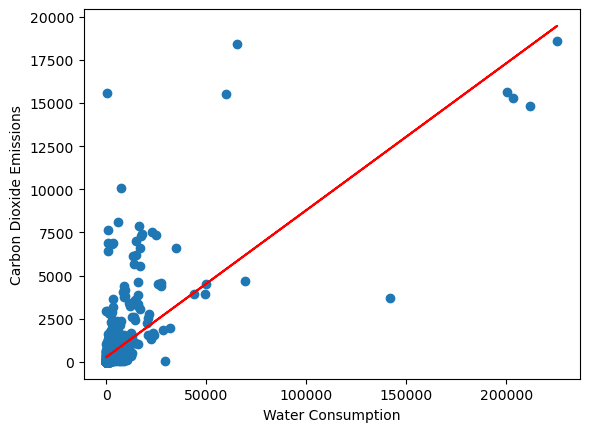

In [12]:
# Plotting 
linear_regress(water_plot_df['water_use'], water_plot_df['total_ghg_emissions'], "Water Consumption", "Carbon Dioxide Emissions")

**Findings:** There appears to be a strong correlation between water consumption and Carbon Dioxide Emissions, the correlation coefficient between the two variables is 0.7173057056152874.

### Relationship Between Source EUI and Carbon Dioxide Emissions for buildings that are Retail Stores

In [13]:
# Create DataFrame for Plotting
eui_plot_df = buildings_df.loc[buildings_df['primary_property_1']=='Retail Store', ["WN_source_eui", "total_ghg_emissions"]]
eui_plot_df.head()

,WN_source_eui,total_ghg_emissions
248,27.3,16.4
430,66.4,118.2
664,7.2,14.0
994,69.0,48.3
1025,263.9,385.9


The r-value is: 0.9830449798002524, the linear equation the line of best fit is: y = 0.54x + 182.50


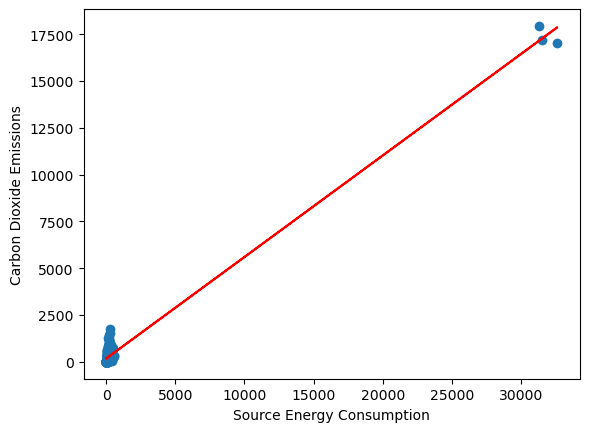

In [14]:
# Plotting 
linear_regress(eui_plot_df['WN_source_eui'], eui_plot_df['total_ghg_emissions'], "Source Energy Consumption", "Carbon Dioxide Emissions")

**Findings:** There appears to be a strong correlation between source energy consumption and Carbon Dioxide Emissions, the correlation coefficient between the two variables is 0.9830449798002524.

In [15]:
# Save for later
# def get_outliers(variable):
#     # Calculate the IQR
#     quartiles = variable.quantile([.25, .5, .75])
#     lower_q = quartiles[.25]
#     upper_q = quartiles[.75]
#     iqr = upper_q - lower_q

#     # Determine lower and upper bounds 
#     lower_bound = lower_q - 1.5 * iqr
#     upper_bound = upper_q + 1.5 * iqr

#     # Determine outliers 
#     outliers = variable.loc[(variable > upper_bound) | (variable < lower_bound)]
#     return outliers.index.to_list()

# What property type has highest source energy and water consumption per square foot for buildings built after 2000?


In [16]:
#Findings for Highest Water Consumption built after 2000:
water_per_gfa = buildings_df.loc[:, ["building_id", "primary_property_1", "water_use", "property_gfa_1","year_built" ]]
water_per_gfa["water usage per gfa"] = water_per_gfa["water_use"]/ water_per_gfa["property_gfa_1"]

water_per_gfa.head()


,building_id,primary_property_1,water_use,property_gfa_1,year_built,water usage per gfa
1,476102819647,Multifamily Housing,2859.8,44769.0,2001.0,0.063879
3,448460885789,Multifamily Housing,1.6,31030.0,2010.0,0.000052
4,488532822539,Manufacturing/Industrial Plant,244.3,65000.0,2007.0,0.003758
5,455587859077,Multifamily Housing,837.1,27777.0,1961.0,0.030136
7,423570837725,Multifamily Housing,1303.9,30095.0,1960.0,0.043326


In [17]:
water_year = water_per_gfa.loc[water_per_gfa["year_built"]>2000,]
water_year


,building_id,primary_property_1,water_use,property_gfa_1,year_built,water usage per gfa
1,476102819647,Multifamily Housing,2859.8,44769.0,2001.0,0.063879
3,448460885789,Multifamily Housing,1.6,31030.0,2010.0,0.000052
4,488532822539,Manufacturing/Industrial Plant,244.3,65000.0,2007.0,0.003758
27,999000000240,Multifamily Housing,4917.7,121379.0,2013.0,0.040515
45,427980806270,Multifamily Housing,6646.3,183174.0,2004.0,0.036284
...,...,...,...,...,...,...
52544,999000000090,Multifamily Housing,1775.1,59000.0,2019.0,0.030086
52552,461274812865,Multifamily Housing,2030.2,45190.0,2008.0,0.044926
52556,420884897089,Self-Storage Facility,229.7,76000.0,2003.0,0.003022
52559,413351940795,Distribution Center,446.0,65918.0,2001.0,0.006766


In [18]:
water_use_max = water_year.groupby("primary_property_1")["water_use"].median().sort_values(ascending = False)
water_use_max
print(f"{water_use_max.index[0]} has the highest water consumption  out of all available property types in LA with a amount of {water_use_max} unit")

Hotel has the highest water consumption  out of all available property types in LA with a amount of primary_property_1
Hotel                             8115.60
Multifamily Housing               3113.40
Mixed Use Property                2958.90
Office                            1736.60
Medical Office                    1241.00
Retail Store                      1102.80
Distribution Center                730.20
Parking                            608.55
Manufacturing/Industrial Plant     548.25
Fire Station                       516.15
Non-Refrigerated Warehouse         440.70
Self-Storage Facility              140.00
Name: water_use, dtype: float64 unit


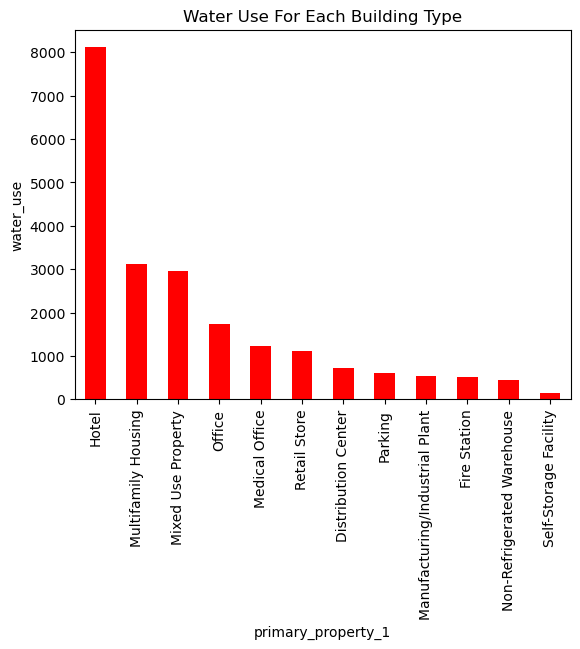

In [19]:
plot_pandas = water_use_max.plot.bar(color='r')
water_use_max
plt.xlabel("primary_property_1")
plt.ylabel("water_use")
plt.title("Water Use For Each Building Type")
plt.show()

In [20]:
# Findings for highest source energy consumption built after 2000.


eui_per_gfa = buildings_df.loc[:, ["building_id", "primary_property_1", "WN_source_eui", "property_gfa_1","year_built" ]]
eui_per_gfa.head()

,building_id,primary_property_1,WN_source_eui,property_gfa_1,year_built
1,476102819647,Multifamily Housing,100.5,44769.0,2001.0
3,448460885789,Multifamily Housing,60.6,31030.0,2010.0
4,488532822539,Manufacturing/Industrial Plant,45.6,65000.0,2007.0
5,455587859077,Multifamily Housing,40.3,27777.0,1961.0
7,423570837725,Multifamily Housing,24.2,30095.0,1960.0


In [21]:
eui_year = eui_per_gfa.loc[eui_per_gfa["year_built"]>2000,]
eui_year

,building_id,primary_property_1,WN_source_eui,property_gfa_1,year_built
1,476102819647,Multifamily Housing,100.5,44769.0,2001.0
3,448460885789,Multifamily Housing,60.6,31030.0,2010.0
4,488532822539,Manufacturing/Industrial Plant,45.6,65000.0,2007.0
27,999000000240,Multifamily Housing,61.5,121379.0,2013.0
45,427980806270,Multifamily Housing,61.5,183174.0,2004.0
...,...,...,...,...,...
52544,999000000090,Multifamily Housing,48.0,59000.0,2019.0
52552,461274812865,Multifamily Housing,44.6,45190.0,2008.0
52556,420884897089,Self-Storage Facility,18.6,76000.0,2003.0
52559,413351940795,Distribution Center,47.0,65918.0,2001.0


In [22]:
eui_use_max = eui_year.groupby("primary_property_1")["WN_source_eui"].median().sort_values(ascending = False)
eui_use_max
print(f"{eui_use_max.index[0]} has the highest energy consumption  out of all available property types in LA with a amount of {eui_use_max} unit")

Medical Office has the highest energy consumption  out of all available property types in LA with a amount of primary_property_1
Medical Office                    168.60
Hotel                             140.50
Retail Store                      131.45
Manufacturing/Industrial Plant    115.25
Office                            115.20
Fire Station                      112.55
Multifamily Housing                69.50
Mixed Use Property                 61.80
Non-Refrigerated Warehouse         31.45
Distribution Center                31.25
Parking                            25.40
Self-Storage Facility              12.10
Name: WN_source_eui, dtype: float64 unit


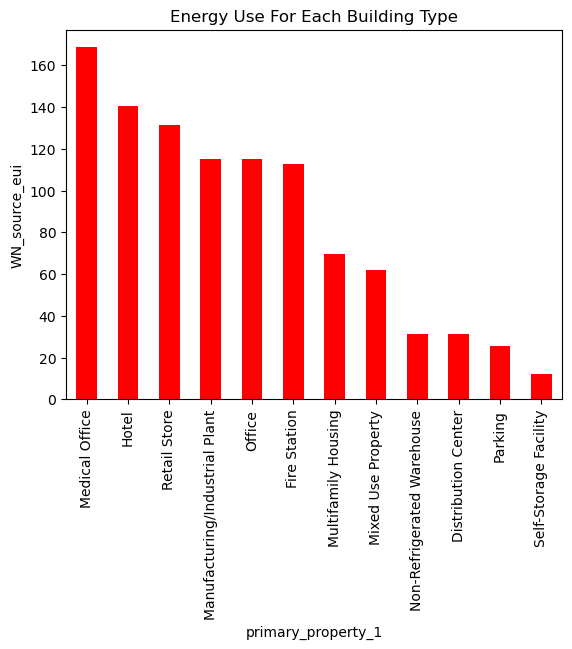

In [23]:
plot_pandas = eui_use_max.plot.bar (color='r')
eui_use_max
plt.xlabel("primary_property_1")
plt.ylabel("WN_source_eui")
plt.title("Energy Use For Each Building Type")
plt.show()